In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset =pd.read_csv('D:\ML\Practice_Codes_ML_PlayList_V2\Datasets\mall-customers\Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.shape

(200, 5)

In [6]:
dataset['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [7]:
pd.value_counts(dataset['Genre'])

Female    112
Male       88
Name: Genre, dtype: int64

In [ ]:
## Want ot just checkout the Annual income and Spending pattern

In [38]:
X= dataset.iloc[:,[3,4]]

## Visualizing the data to see distribution

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

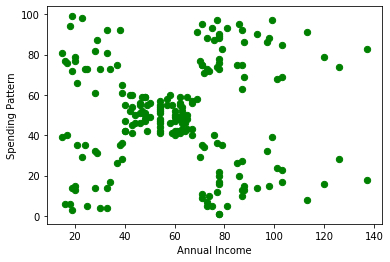

In [28]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c='green',s=40)
plt.xlabel('Annual Income')
plt.ylabel('Spending Pattern')
plt.show()

## K Means Clustering

In [29]:
from sklearn.cluster import KMeans

In [30]:
wcss = []
for i in range(1,11):
    km =KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

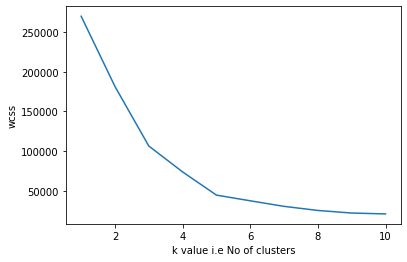

In [34]:
plt.plot(range(1,11),wcss)
plt.xlabel('k value i.e No of clusters')
plt.ylabel('wcss')
plt.show()

## So we can say that k =5 i.e 5 clusters the scatter plot can be broken into

In [39]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [36]:
X=X.values  ## converted into an array

In [44]:
km =KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300,random_state=0)
km.fit(X)
km.predict(X)
y_kmeans=km.predict(X)

In [45]:
y_kmeans()

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [46]:
km.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

## Visualizing the Clsuters

In [56]:
X= dataset.iloc[:,[3,4]].values

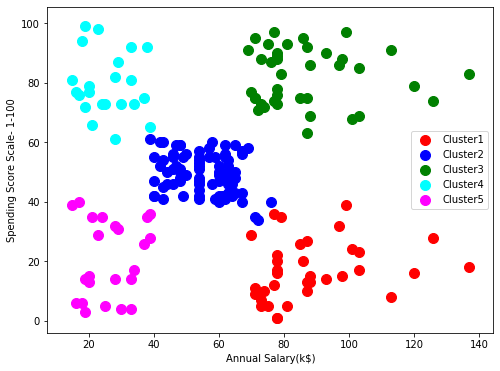

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(X[y_kmeans == 0,0 ] , X[y_kmeans== 0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans == 1,0 ] , X[y_kmeans== 1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans == 2,0 ] , X[y_kmeans== 2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_kmeans == 3,0 ] , X[y_kmeans== 3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(X[y_kmeans == 4,0 ] , X[y_kmeans== 4,1],s=100,c='magenta',label='Cluster5')
plt.xlabel('Annual Salary(k$)')
plt.ylabel('Spending Score Scale- 1-100')
plt.legend()
plt.show()

## Hierarchial Clustering

### Dendograms

In [76]:
import scipy.cluster.hierarchy as sch

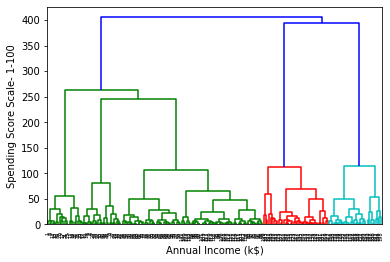

In [80]:
dendogram =sch.dendrogram(sch.linkage(X,method='ward', metric='euclidean'))
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score Scale- 1-100')
plt.show()

## DBSCAN

In [85]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [86]:
X= dataset.iloc[:,[3,4]].values

In [87]:
from sklearn.cluster import DBSCAN

In [88]:
db =DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [89]:
model =db.fit(X)

In [90]:
model

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [91]:
model.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [92]:
label = model.labels_

### -1 are basically outliers

In [93]:
a= {i:i for i in label if i != -1}

In [94]:
a

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}

In [96]:
n_cluster = len(a.keys())

In [98]:
n_cluster

9

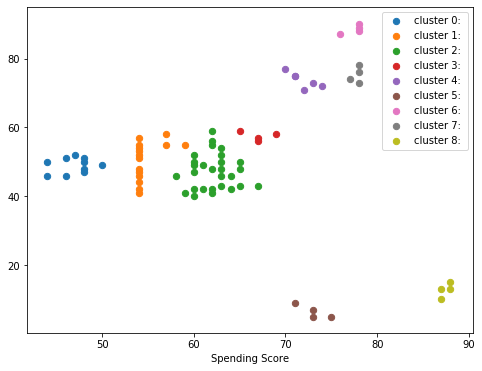

In [104]:
plt.figure(figsize=(8,6))
for i in range(0,n_cluster):
    plt.scatter(X[label == i,0], X[label == i,1],s=40,label='cluster {}: '.format(i))

plt.xlabel('Annual Income (k$)')
plt.xlabel('Spending Score')
plt.legend()
plt.show()